## Machine Learnining: Lab and HW 10
### Homework Tasks:
* Plot the error
* Model XOR with the help of sigmoid, linear
* Add moments rule to learning equation


In [1]:
import numpy as np

k = 1
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-k*x))

def sigmoid_prime(x):
    return sigmoid(x)*(1.0-sigmoid(x))

def tanh(x):
    return np.tanh(x)

def tanh_prime(x):
    return 1.0 - x**2

def linear(x):
    return x

def linear_prime(x):
    return 1


In [2]:
import numpy as np


class NeuralNetwork:

    def __init__(self, layers):
        self.activation = tanh
        self.activation_prime = tanh_prime
#         self.activation = linear
#         self.activation_prime = linear_prime
#         self.activation = sigmoid
#         self.activation_prime = sigmoid_prime
        
        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            print(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)

    def fit(self, X, y, learning_rate=0.2, epochs=100000):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
         
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]

            for l in range(len(self.weights)):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation(dot_value)
                    a.append(activation)
            # output layer
            error = y[i] - a[-1]
            deltas = [error * self.activation_prime(a[-1])]

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1): 
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                self.weights[i] += learning_rate * layer.T.dot(delta)

            if k % 10000 == 0: 
                print('epochs:', k)

    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(0, len(self.weights)):
            a = self.activation(np.dot(a, self.weights[l]))
        return a

if __name__ == '__main__':

    nn = NeuralNetwork([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])
    for e in X:
        print(e,nn.predict(e))
    nn.fit(X, y)
    for e in X:
        print(e,nn.predict(e))

[[-0.64237976  0.08571054 -0.31590785]
 [-0.22065101  0.23273557 -0.64574424]
 [ 0.63461946  0.85996073  0.39531015]]
[[-0.99903261]
 [-0.90952223]
 [ 0.53149529]]
[0 0] [0.31462653]
[0 1] [-0.55195944]
[1 0] [0.02094205]
[1 1] [-0.66420753]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
[0 0] [2.24137344e-05]
[0 1] [0.99535591]
[1 0] [0.99519396]
[1 1] [-6.30903827e-07]


[[-0.92307432 -0.31430643 -0.62886568]
 [ 0.61121111 -0.96330066 -0.38001911]
 [-0.34867695  0.61236022  0.43941777]]
[[-0.23034087]
 [-0.48988274]
 [-0.9091904 ]]
[0 0] [0.71876699]
[0 1] [0.57912174]
[1 0] [0.83410177]
[1 1] [0.73023128]
epochs: 0
epochs: 10000
epochs: 20000
epochs: 30000
epochs: 40000
epochs: 50000
epochs: 60000
epochs: 70000
epochs: 80000
epochs: 90000
epochs: 100000
epochs: 110000
epochs: 120000
epochs: 130000
epochs: 140000
epochs: 150000
epochs: 160000
epochs: 170000
epochs: 180000
epochs: 190000
epochs: 200000
epochs: 210000
epochs: 220000
epochs: 230000
epochs: 240000
epochs: 250000
epochs: 260000
epochs: 270000
epochs: 280000
epochs: 290000
epochs: 300000
epochs: 310000
epochs: 320000
epochs: 330000
epochs: 340000
epochs: 350000
epochs: 360000
epochs: 370000
epochs: 380000
epochs: 390000
epochs: 400000
epochs: 410000
epochs: 420000
epochs: 430000
epochs: 440000
epochs: 450000
epochs: 460000
epochs: 470000
epochs: 480000
epochs: 490000
epochs: 500000
epochs: 5

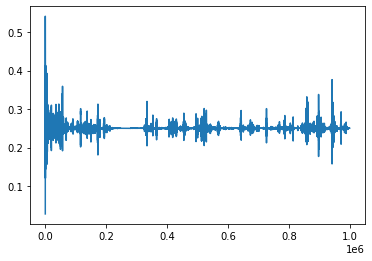

In [4]:
import numpy as np
import matplotlib.pyplot as plt


class XOR:

    def __init__(self, layers):
        self.activation_linear = linear
        self.activation_linear_prime = linear_prime
        self.activation_sigmoid = sigmoid
        self.activation_sigmoid_prime = sigmoid_prime
        
        # Set weights
        self.weights = []
        # layers = [2,2,1]
        # range of weight values (-1,1)
        # input and hidden layers - random((2+1, 2+1)) : 3 x 3
        self.moments = []
        for i in range(1, len(layers) - 1):
            r = 2*np.random.random((layers[i-1] + 1, layers[i] + 1)) -1
            self.weights.append(r)
            self.moments.append(np.zeros(r.shape))
            print(r)
        # output layer - random((2+1, 1)) : 3 x 1
        r = 2*np.random.random( (layers[i] + 1, layers[i+1])) - 1
        print(r)
        self.weights.append(r)
        self.moments.append(np.zeros(r.shape))

    def fit(self, X, y, learning_rate=0.2, epochs=100000, gamma=0.1):
        # Add column of ones to X
        # This is to add the bias unit to the input layer
        ones = np.atleast_2d(np.ones(X.shape[0]))
        X = np.concatenate((ones.T, X), axis=1)
        errors = []
        
        for k in range(epochs):
            i = np.random.randint(X.shape[0])
            a = [X[i]]
            
            for l in range(len(self.weights)-1):
                    dot_value = np.dot(a[l], self.weights[l])
                    activation = self.activation_linear(dot_value)
                    a.append(activation)
            a.append(self.activation_sigmoid(np.dot(a[-1], self.weights[-1])))
            # output layer
            error = y[i] - a[-1]
            errors.append(error**2)
            deltas = [error * self.activation_sigmoid_prime(a[-1])]

            # we need to begin at the second to last layer 
            # (a layer before the output layer)
            for l in range(len(a) - 2, 0, -1):
                deltas.append(deltas[-1].dot(self.weights[l].T)*self.activation_linear_prime(a[l]))

            # reverse
            # [level3(output)->level2(hidden)]  => [level2(hidden)->level3(output)]
            deltas.reverse()

            # backpropagation
            # 1. Multiply its output delta and input activation 
            #    to get the gradient of the weight.
            # 2. Subtract a ratio (percentage) of the gradient from the weight.
            for i in range(len(self.weights)):
                layer = np.atleast_2d(a[i])
                delta = np.atleast_2d(deltas[i])
                prev_weight = np.copy(self.weights[i])
                self.weights[i] += learning_rate * layer.T.dot(delta) + gamma*self.moments[i]
                self.moments[i] = self.weights[i]-prev_weight

            if k % 10000 == 0: 
                print('epochs:', k)
                
        return errors

    def predict(self, x): 
    
        a = np.concatenate((np.ones(1).T, np.array(x)))      

        for l in range(len(self.weights)-1):
            a = self.activation_linear(np.dot(a, self.weights[l]))
        return self.activation_sigmoid(np.dot(a, self.weights[-1]))
    

if __name__ == '__main__':

    nn = XOR([2,2,1])
    X = np.array([[0, 0],
                  [0, 1],
                  [1, 0],
                  [1, 1]])
    y = np.array([0, 1, 1, 0])
#     X = np.array([[-1, -1],
#                   [-1, 1],
#                   [1, -1],
#                   [1, 1]])
#     y = np.array([0, 1, 1, 0])
    epochs = 1000000
    for e in X:
        print(e,nn.predict(e))
    errors = nn.fit(X, y, epochs=epochs, learning_rate=0.2, gamma=0.1)
    for e in X:
        print(e,nn.predict(e))
        
    plt.plot(np.arange(epochs), errors)
